In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

# Interpolación lineal

<img src="interlineal.png" alt="drawing" width="500"/>

$f(x)\approx y=\frac{y_{i+1}-y_i}{x_{i+1}-x_{i}}(x-x_i)+y_i$


#### Algoritmo
0. Semillas $x$, $\lbrace (x_i,y_i) \rbrace$


1. Encontrar el intervalo tal que $x \in [x_i,x_{i+1}]$


2. $y \approx f(x)$


3. Analizar error si se puede. $\epsilon=\frac{|y-f(x)|}{|f(x)|}$

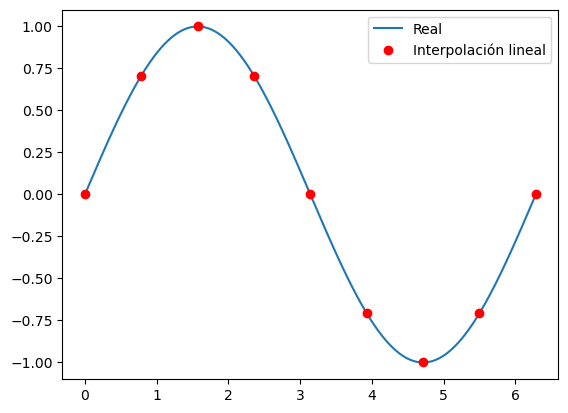

In [2]:
def f(x):
    return np.sin(x)

xn=np.linspace(0,2*np.pi,9)
yn=f(xn)

xreal=np.linspace(0,2*np.pi,1000)

#print('La solución encontrada para f(',x_sol,') es:',y_sol)
#print('La solución real para f(',x_sol,') es:',f(x_sol))


#print('La solución tiene un error relativo de',error*100,'%')

plt.plot(xreal,f(xreal),label='Real')
plt.plot(xn,yn,'o',color='red',label='Interpolación lineal')
#plt.plot(x_sol,y_sol,'o',color='green',label='Valor encontrado')
plt.legend()

# Interpolación lineal

##### Comparación con el valor real 

$\langle \epsilon \rangle = \frac{1}{n}\sum_i \epsilon_i $

$\epsilon_i = |y_i-f(x_i)|$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


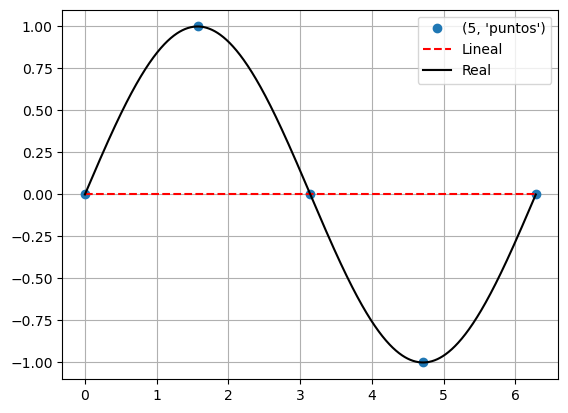

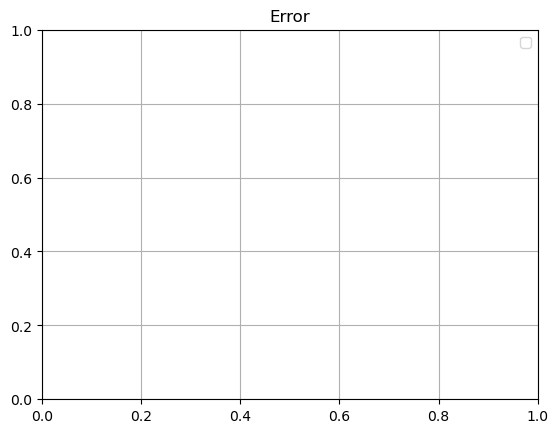

In [3]:
puntos=5

xn=np.linspace(0,2*np.pi,puntos)
yn=f(xn)

xreal=np.linspace(0,2*np.pi,1000)
yreal=f(xreal)
ylin=np.zeros(len(xreal))


plt.figure()    
plt.plot(xn,yn,'o',label=(puntos,'puntos'))
plt.plot(xreal,ylin,'--',color='red',label='Lineal')
plt.plot(xreal,yreal,color='black',label='Real')

plt.grid()
plt.legend()


plt.figure()
plt.title('Error')
#plt.plot(xreal,errlin,color='red',label='Lineal')
plt.legend()
plt.grid()

#print ('Lineal: Error promedio es ', errpromlin)


# Objetivos de hoy

1. Método de Lagrange
2. Método de diferencias divididas
3. Método de Hermite

# Interpolación a polinomios de grado n

$f(x) \approx P_n(x)=a_{n}x^{n}+a_{n-1}x^{n-1}+...+a_{1}x+a_{0}$

# Método de Lagrange

#### Algoritmo
0. Semillas $x$, $\lbrace (x_i,y_i) \rbrace$


1. Determinar grado del polinomio $n=$ elementos del conjunto $-1$


2. $f(x) \approx P_n(x) = \sum_{i}^{n} f(x_i) L_{n,i}(x) = \sum_{i}^{n} y_i L_{n,i}(x)$


3. $L_{n,i}(x)=\Pi_{m}^{n} \frac{x-x_m}{x_i-x_m}$ con $m\neq i$


$L_{n,i}(x_j) = \begin{cases}
1 & j=i \\
0 & j\neq i
\end{cases}$

4. Analizar error $\epsilon=|y-f(x)|$

Lineal: Error promedio es  0.6359826284722284
Lagrange: Error promedio es  0.6359826284722284


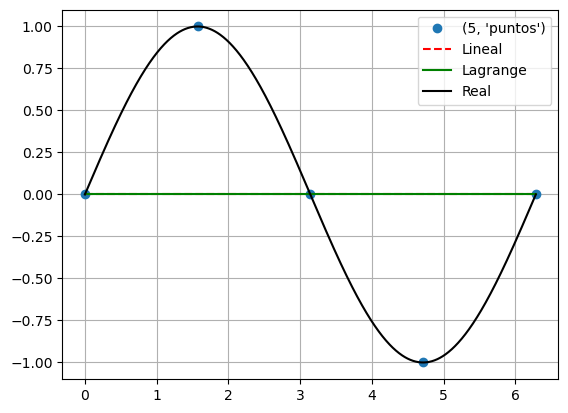

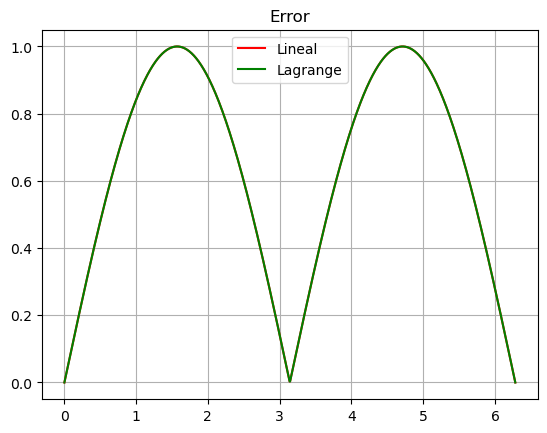

In [4]:
puntos=5

xn=np.linspace(0,2*np.pi,puntos)
yn=f(xn)

xreal=np.linspace(0,2*np.pi,1000)
yreal=f(xreal)
ylin=np.zeros(len(xreal))
ylag=np.zeros(len(xreal))

plt.figure()    
plt.plot(xn,yn,'o',label=(puntos,'puntos'))
plt.plot(xreal,ylin,'--',color='red',label='Lineal')
plt.plot(xreal,ylag,color='green',label='Lagrange')
plt.plot(xreal,yreal,color='black',label='Real')
plt.grid()
plt.legend()

errlin=abs((yreal-ylin))
errlag=abs((yreal-ylag))

plt.figure()
plt.title('Error')
plt.plot(xreal,errlin,color='red',label='Lineal')
plt.plot(xreal,errlag,color='green',label='Lagrange')
plt.legend()
plt.grid()

errpromlin=sum(errlin)/len(errlin)
errpromlag=sum(errlag)/len(errlag)
print ('Lineal: Error promedio es ', errpromlin)
print ('Lagrange: Error promedio es ', errpromlag)

## Reto
Graficar $\langle\epsilon \rangle$ vs $n$ donde $\langle\epsilon \rangle$ es el error absoluto promedio y $n$ el número de puntos

# Método de Diferencias divididas

$f(x) \approx P_n(x) = a_{0} + a_{1} (x-x_{0}) + a_{2} (x-x_{0})(x-x_{1}) +... a_{n} (x-x_{0})(x-x_{1})...(x-x_{n-1})$

### Grado 0
$f(x_0)= y_0 =a_0=D_0[x_0]$ 

$D_0[x_i]=f[x_i]=y_i$

### Grado 1
$f(x_1)=y_1 =a_0+a_1(x_1-x_0) \rightarrow a_1=\frac{y_1-y_0}{x_1-x_0}=D_1[x_0]$

$D_1[x_i]=f[x_i,x_{i+1}]=\frac{D_0[x_{i+1}]-D_0[x_i]}{x_{i+1}-x_i}$ 

### Grado 2
$f(x_2)=y_2=a_{0} + a_{1} (x_2-x_{0}) + a_{2} (x_2-x_{0})(x_2-x_{1}) \rightarrow 
a_2= D_2[x_0] = \frac{D_1[x_1]-D_1[x_0]}{x_2-x_0}$

$D_2[x_i]=f[x_i,x_{i+1},x_{i+2}]=\frac{D_1[x_{i+1}]-D_1[x_i]}{x_{i+2}-x_i}$

...

### Grado k
$f(x_k)=y_k \rightarrow a_k=D_k[x_0]$

$D_k[x_i]=f[x_i,x_{i+1},x_{i+2},...,x_{i+k}]=\frac{D_{k-1}[x_{i+1}]-D_{k-1}[x_i]}{x_{i+k}-x_i}$

#### Algoritmo
0. Semillas $x$, $\lbrace (x_i,y_i) \rbrace$


1. Determinar grado del polinomio $n=$ elementos del conjunto $-1$


2. $f(x)\approx P_n(x) = D_0[x_0] + \sum_{k=1}^{n} D_k[x_0] (x-x_0)(x-x_1)...(x-x_{k-1})$


3. $D_k[x_i]=f[x_i,x_{i+1},x_{i+2},...,x_{i+k}]=\frac{D_{k-1}[x_{i+1}]-D_{k-1}[x_i]}{x_{i+k}-x_i}$


4. Analizar error $\epsilon=|y-f(x)|$

Lineal: Error promedio es  0.6359826284722284
Lagrange: Error promedio es  0.6359826284722284
Diferencias divididas: Error promedio es  0.6359826284722284


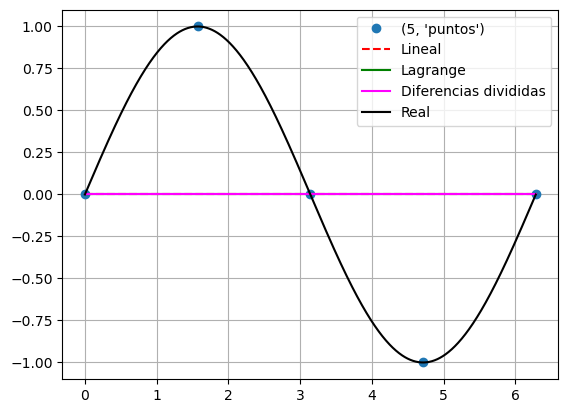

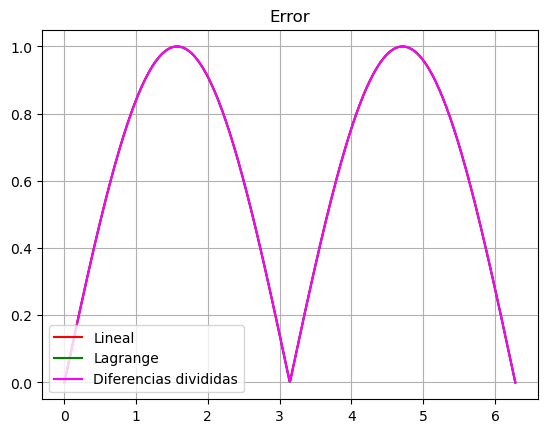

In [5]:
puntos=5

xn=np.linspace(0,2*np.pi,puntos)
yn=f(xn)

xreal=np.linspace(0,2*np.pi,1000)
yreal=f(xreal)
ylin=np.zeros(len(xreal))
ylag=np.zeros(len(xreal))
ydif=np.zeros(len(xreal))


plt.figure()    
plt.plot(xn,yn,'o',label=(puntos,'puntos'))
plt.plot(xreal,ylin,'--',color='red',label='Lineal')
plt.plot(xreal,ylag,color='green',label='Lagrange')
plt.plot(xreal,ydif,color='magenta',label='Diferencias divididas')
plt.plot(xreal,yreal,color='black',label='Real')
plt.grid()
plt.legend()

errlin=abs((yreal-ylin))
errlag=abs((yreal-ylag))
errdif=abs((yreal-ydif))

plt.figure()
plt.title('Error')
plt.plot(xreal,errlin,color='red',label='Lineal')
plt.plot(xreal,errlag,color='green',label='Lagrange')
plt.plot(xreal,errdif,color='magenta',label='Diferencias divididas')
plt.legend()
plt.grid()

errpromlin=sum(errlin)/len(errlin)
errpromlag=sum(errlag)/len(errlag)
errpromdif=sum(errdif)/len(errdif)
print ('Lineal: Error promedio es ', errpromlin)
print ('Lagrange: Error promedio es ', errpromlag)
print ('Diferencias divididas: Error promedio es ', errpromdif)

# Reto

Demostrar que para cualquier conjunto $\lbrace (x_i,f(x_i))\rbrace$ de $n+1$ elementos, el polinomío de grado $n$

$P_n(x) = \sum_{i=0}^{n} f(x_i) L_{n,i}(x)  = D_0[x_0] + \sum_{k=1}^{n} D_k[x_0] (x-x_0)(x-x_1)...(x-x_{k-1})$

con 

$L_{n,k}(x)=\Pi_{m=0}^{n} \frac{x-x_m}{x_k-x_m}$ con $m\neq k$

En otras palabras, demuestre que el método de interpolacion de Lagrange y el método de interpolación de Diferencias divididas son equivalentes.


### Ejemplo $n=1$

$P_1(x)=\sum_{i=0}^{1} f(x_i) L_{1,i}(x)= f(x_0)L_{1,0}(x)+f(x_1)L_{1,1}(x)$

$=f(x_0)\frac{x-x_1}{x_0-x_1}+f(x_1)\frac{x-x_0}{x_1-x_0}$

$=\frac{1}{x_1-x_0}[f(x_1)(x-x_0)-f(x_0)(x-x_1)]$

$=\frac{1}{x_1-x_0}[f(x_0)x_1-f(x_1)x_0+x(f(x_1)-f(x_0))]$

$=\frac{1}{x_1-x_0}[f(x_0)x_1-f(x_1)x_0+x(f(x_1)-f(x_0))-x_0(f(x_1)-f(x_0))+x_0(f(x_1)-f(x_0))]$

$=\frac{1}{x_1-x_0}[f(x_0)x_1-f(x_1)x_0+(x-x_0)(f(x_1)-f(x_0))+x_0f(x_1)-x_0f(x_0)]$

$=\frac{1}{x_1-x_0}[f(x_0)(x_1-x_0)+(x-x_0)(f(x_1)-f(x_0))]$

$=D_0[x_0]+D_1[x_0](x-x_0)$